### Problem Statement : To create a model that predicts the  class data based on the features


In [2]:
# K Nearest Neighbors Project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Classified+Data')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
# Standardize the Variables
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()

In [6]:
# Fit scaler to the features.

scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
# Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [9]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [10]:
df_feat

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df_feat
Y=df['TARGET CLASS']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [13]:
#Importing KNN library
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Create a KNN model instance with n_neighbors=1

knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
# Fit this KNN model to the training data.

knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
# Use the predict method to predict values using your KNN model and X_test.

pred=knn.predict(X_test)

In [17]:
print(pred)

[0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 0]


In [18]:
# Create a confusion matrix and classification report.

from sklearn.metrics import classification_report,confusion_matrix

In [19]:

print(confusion_matrix(Y_test,pred))

[[145  14]
 [ 12 129]]


In [20]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [21]:
# use the elbow method to pick a good K Value!

# Create a for loop that trains various KNN models with different k values,
# then keep track of the error_rate for each of these models with a list. 

In [22]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))

In [23]:
# Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error rate')

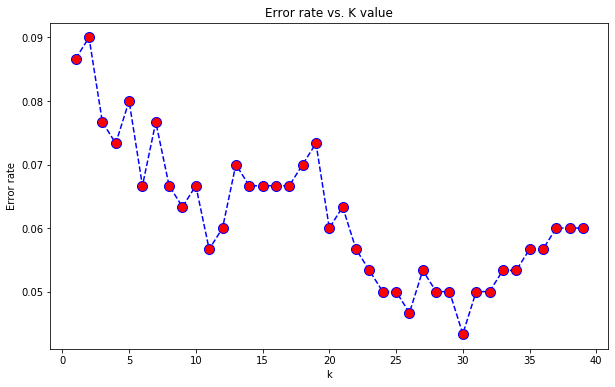

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs. K value")
plt.xlabel('k')
plt.ylabel('Error rate')

In [25]:
# Retrain your model with the best K value (up to you to decide what you want) 
# and re-do the classification report and the confusion matrix.

In [28]:
knn=KNeighborsClassifier(n_neighbors=31)  #as observed from graph, because the K values tends to increase 
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print(confusion_matrix(Y_test,pred))
print("K= 31")
print('\n')
print(classification_report(Y_test,pred))

[[151   8]
 [  7 134]]
K= 31


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.94      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [27]:
# Gives an accuracy of 95%